# Problem Statement

Loans play a crucial role in the modern economy, providing essential financial support for various needs such as education, living expenses, and major purchases like homes and cars.

However, capable of predicting personal loan customers in bank is also difficult.

The case concerns Thera Bank, a financial institution aiming to increase its personal loan customer base from existing liability customers, while maintaining their status as depositors.

Last year, a campaign targeting liability customers yielded a successful conversion rate of over 9%. This success has motivated the retail marketing department to develop more targeted campaigns to enhance the success rate while minimizing expenditure.

To streamline this decision-making process, we will leverage Python-based Machine Learning techniques. 

# Objective

By analyzing key applicant details such as 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage', 'Personal Loan', 'Securities Account', 'CD Account','Online', 'CreditCard'. 

Build various machine learning models capable of predicting personal loan customers.
 
This predictive model aims to enhance efficiency and accuracy in evaluating Customers to predict the capable of personal loans. benefiting for Bank empolyees and lending institutions alike.

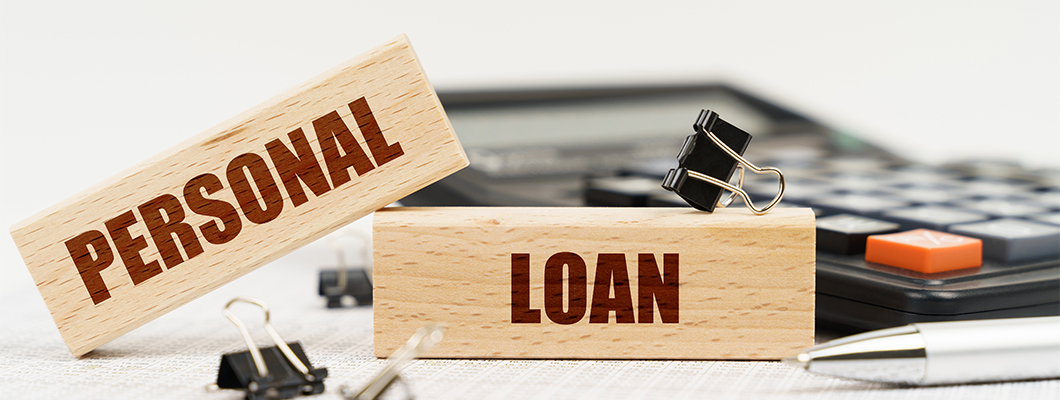


|Variable Name	   |              Description	                |            Sample Data                |
|:----------------:|:------------------------------------------:|:-------------------------------------:|
|ID	               |   Customer ID                              |	1, 2, ...                           |
|Age	           |Customer's age in completed years	        |   25, 45, ...                         |
|Experience	       |Years of professional experience	        |   1, 19, ...                          |
|Income	           |Annual income of the customer (1000 Dollar)	|   49, 34, ...                         |
|Zip Code          |	Home Address ZIP code	                | 91107, 90089, ...                     |
|Family	           |  Family size of the customer               | (1, 2, 3, 4)	4, 3, ...               |
|CCAvg	           |Avg. spending on credit cards per month (1000 Dollar)|	1/60, 1/50, ...             |
|Education	       | Education Level(1: Undergrad; 2: Graduate; 3: Advanced/Professional)|	1, 2, ...   |
|Mortgage	       |Value of house mortgage if any. ($1000)	    | 0, 101, ...                           |
|Personal Loan	   |Did this customer accept the personal loan offered in the last campaign?(0, 1)|	0(No), 1(Yes)|
|Securityaccount|	Does the customer have a securities account with this bank?(0, 1)|	0(No), 1(Yes)|
|Cd_account|	Does the customer have a certificate of deposit (CD) account with this bank?(0, 1)|	0(No), 1(Yes)|
|Online	|Does the customer use internet banking facilities?(0, 1) |	0(No), 1(Yes)|
|CreditCard|	Does the customer use a credit card issued by Universal Bank?(0, 1)|	0(No), 1(Yes)|

# Import Library and Load the data

In [1]:
# import library 
import pandas as pd
import numpy as np
import time
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import RFE

In [35]:
# load the data
dataset = pd.read_csv('bank_loan.csv')
dataset

ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  \
0        1   25           1      49     91108       4  1/60          1   
1        2   45          19      34     90089       3  1/50          1   
2        3   39          15      11     94720       1  1/00          1   
3        4   35           9     100     94112       1  2/70          2   
4        5   35           8      45     91330       4  1/00          2   
...    ...  ...         ...     ...       ...     ...   ...        ...   
4995  4996   29           3      40     92697       1  1/90          3   
4996  4997   30           4      15     92037       4  0/40          1   
4997  4998   63          39      24     93023       2  0/30          3   
4998  4999   65          40      49     90034       3  0/50          2   
4999  5000   28           4      83     92612       3  0/80          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

# Preprocess the data 

In [36]:
# check whether this data contains null / categorical value
dataset.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


Based on analysis there is no null values in the dataset. 

In [38]:
dataset['CCAvg']

0       1/60
1       1/50
2       1/00
3       2/70
4       1/00
        ... 
4995    1/90
4996    0/40
4997    0/30
4998    0/50
4999    0/80
Name: CCAvg, Length: 5000, dtype: object

In [39]:
#It seems that the / sign in column CCAvg represents a decimal. 
#Therefore, we first correct the CCAvg column by replace . instead of / and then convert type of CCAvg to float64:

dataset['CCAvg'] = dataset['CCAvg'].str.replace('/', '.').astype('float64')
dataset

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91108       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [40]:
dataset['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

# Experience column

In [41]:
# in experience column some values are negative so by using abs() changing the value with actual value
dataset[dataset['Experience']<0]

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
89      90   25          -1     113     94303       4   2.30          3   
226    227   24          -1      39     94085       2   1.70          2   
315    316   24          -2      51     90630       3   0.30          3   
451    452   28          -2      48     94132       2   1.75          3   
524    525   24          -1      75     93014       4   0.20          1   
536    537   25          -1      43     92173       3   2.40          2   
540    541   25          -1     109     94010       4   2.30          3   
576    577   25          -1      48     92870       3   0.30          3   
583    584   24          -1      38     95045       2   1.70          2   
597    598   24          -2     125     92835       2   7.20          1   
649    650   25          -1      82     92677       4   2.10          3   
670    671   23          -1      61     92374       4   2.60          1   
686    687   24          -1      38     92612       4   0.60          2   
793    794   24          -2     150     94720       2   2.00          1   
889    890   24          -2      82     91103       2   1.60          3   
909    910   23          -1     149     91709       1   6.33          1   
1173  1174   24          -1      35     94305       2   1.70          2   
1428  1429   25          -1      21     94583       4   0.40          1   
1522  1523   25          -1     101     94720       4   2.30          3   
1905  1906   25          -1     112     92507       2   2.00          1   
2102  2103   25          -1      81     92647       2   1.60          3   
2430  2431   23          -1      73     92120       4   2.60          1   
2466  2467   24          -2      80     94105       2   1.60          3   
2545  2546   25          -1      39     94720       3   2.40          2   
2618  2619   23          -3      55     92704       3   2.40          2   
2717  2718   23          -2      45     95422       4   0.60          2   
2848  2849   24          -1      78     94720       2   1.80          2   
2876  2877   24          -2      80     91107       2   1.60          3   
2962  2963   23          -2      81     91711       2   1.80          2   
2980  2981   25          -1      53     94305       3   2.40          2   
3076  3077   29          -1      62     92672       2   1.75          3   
3130  3131   23          -2      82     92152       2   1.80          2   
3157  3158   23          -1      13     94720       4   1.00          1   
3279  3280   26          -1      44     94901       1   2.00          2   
3284  3285   25          -1     101     95819       4   2.10          3   
3292  3293   25          -1      13     95616       4   0.40          1   
3394  3395   25          -1     113     90089       4   2.10          3   
3425  3426   23          -1      12     91605       4   1.00          1   
3626  3627   24          -3      28     90089       4   1.00          3   
3796  3797   24          -2      50     94920       3   2.40          2   
3824  3825   23          -1      12     95064       4   1.00          1   
3887  3888   24          -2     118     92634       2   7.20          1   
3946  3947   25          -1      40     93117       3   2.40          2   
4015  4016   25          -1     139     93106       2   2.00          1   
4088  4089   29          -1      71     94801       2   1.75          3   
4116  4117   24          -2     135     90065       2   7.20          1   
4285  4286   23          -3     149     93555       2   7.20          1   
4411  4412   23          -2      75     90291       2   1.80          2   
4481  4482   25          -2      35     95045       4   1.00          3   
4514  4515   24          -3      41     91768       4   1.00          3   
4582  4583   25          -1      69     92691       3   0.30          3   
4957  4958   29          -1      50     95842       2   1.75          3   

      Mortgage  Personal Loan  S

In [42]:
dataset[dataset['Experience']<0] = dataset[dataset['Experience']<0].abs()
dataset

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91108       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

In [43]:
dataset[dataset['Experience']<0]

Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []

In [44]:
# convert annual income to monthly with divide by 12, in descrition the ccavg value per month so need to convert the data based on month
dataset['Income'] = round(dataset['Income']/12,3)
dataset

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1   4.083     91108       4    1.6          1   
1        2   45          19   2.833     90089       3    1.5          1   
2        3   39          15   0.917     94720       1    1.0          1   
3        4   35           9   8.333     94112       1    2.7          2   
4        5   35           8   3.750     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3   3.333     92697       1    1.9          3   
4996  4997   30           4   1.250     92037       4    0.4          1   
4997  4998   63          39   2.000     93023       2    0.3          3   
4998  4999   65          40   4.083     90034       3    0.5          2   
4999  5000   28           4   6.917     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

# Dropping the unwanted column

In [45]:
dataset = dataset.drop(['ID','ZIP Code'],axis =1)
dataset

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1   4.083       4    1.6          1         0   
1      45          19   2.833       3    1.5          1         0   
2      39          15   0.917       1    1.0          1         0   
3      35           9   8.333       1    2.7          2         0   
4      35           8   3.750       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3   3.333       1    1.9          3         0   
4996   30           4   1.250       4    0.4          1        85   
4997   63          39   2.000       2    0.3          3         0   
4998   65          40   4.083       3    0.5          2         0   
4999   28           4   6.917       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   float64
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 468.9 KB


In [47]:
dataset.describe()

Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.134600     6.147856     2.396400     1.937938   
std      11.463166    11.415189     3.836153     1.147663     1.747659   
min      23.000000     0.000000     0.667000     1.000000     0.000000   
25%      35.000000    10.000000     3.250000     1.000000     0.700000   
50%      45.000000    20.000000     5.333000     2.000000     1.500000   
75%      55.000000    30.000000     8.167000     3.000000     2.500000   
max      67.000000    43.000000    18.667000     4.000000    10.000000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000   101.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

       CD Account       Online   CreditCard  
count  5000.00000  5000.000000  5000.000000  
mean      0.06040     0.596800     0.294000  
std       0.23825     0.490589     0.455637  
min       0.00000     0.000000     0.000000  
25%       0.00000     0.000000     0.000000  
50%       0.00000     1.000000     0.000000  
75%       0.00000     1.000000     1.000000  
max       1.00000     1.000000     1.000000

# To check the outliers

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


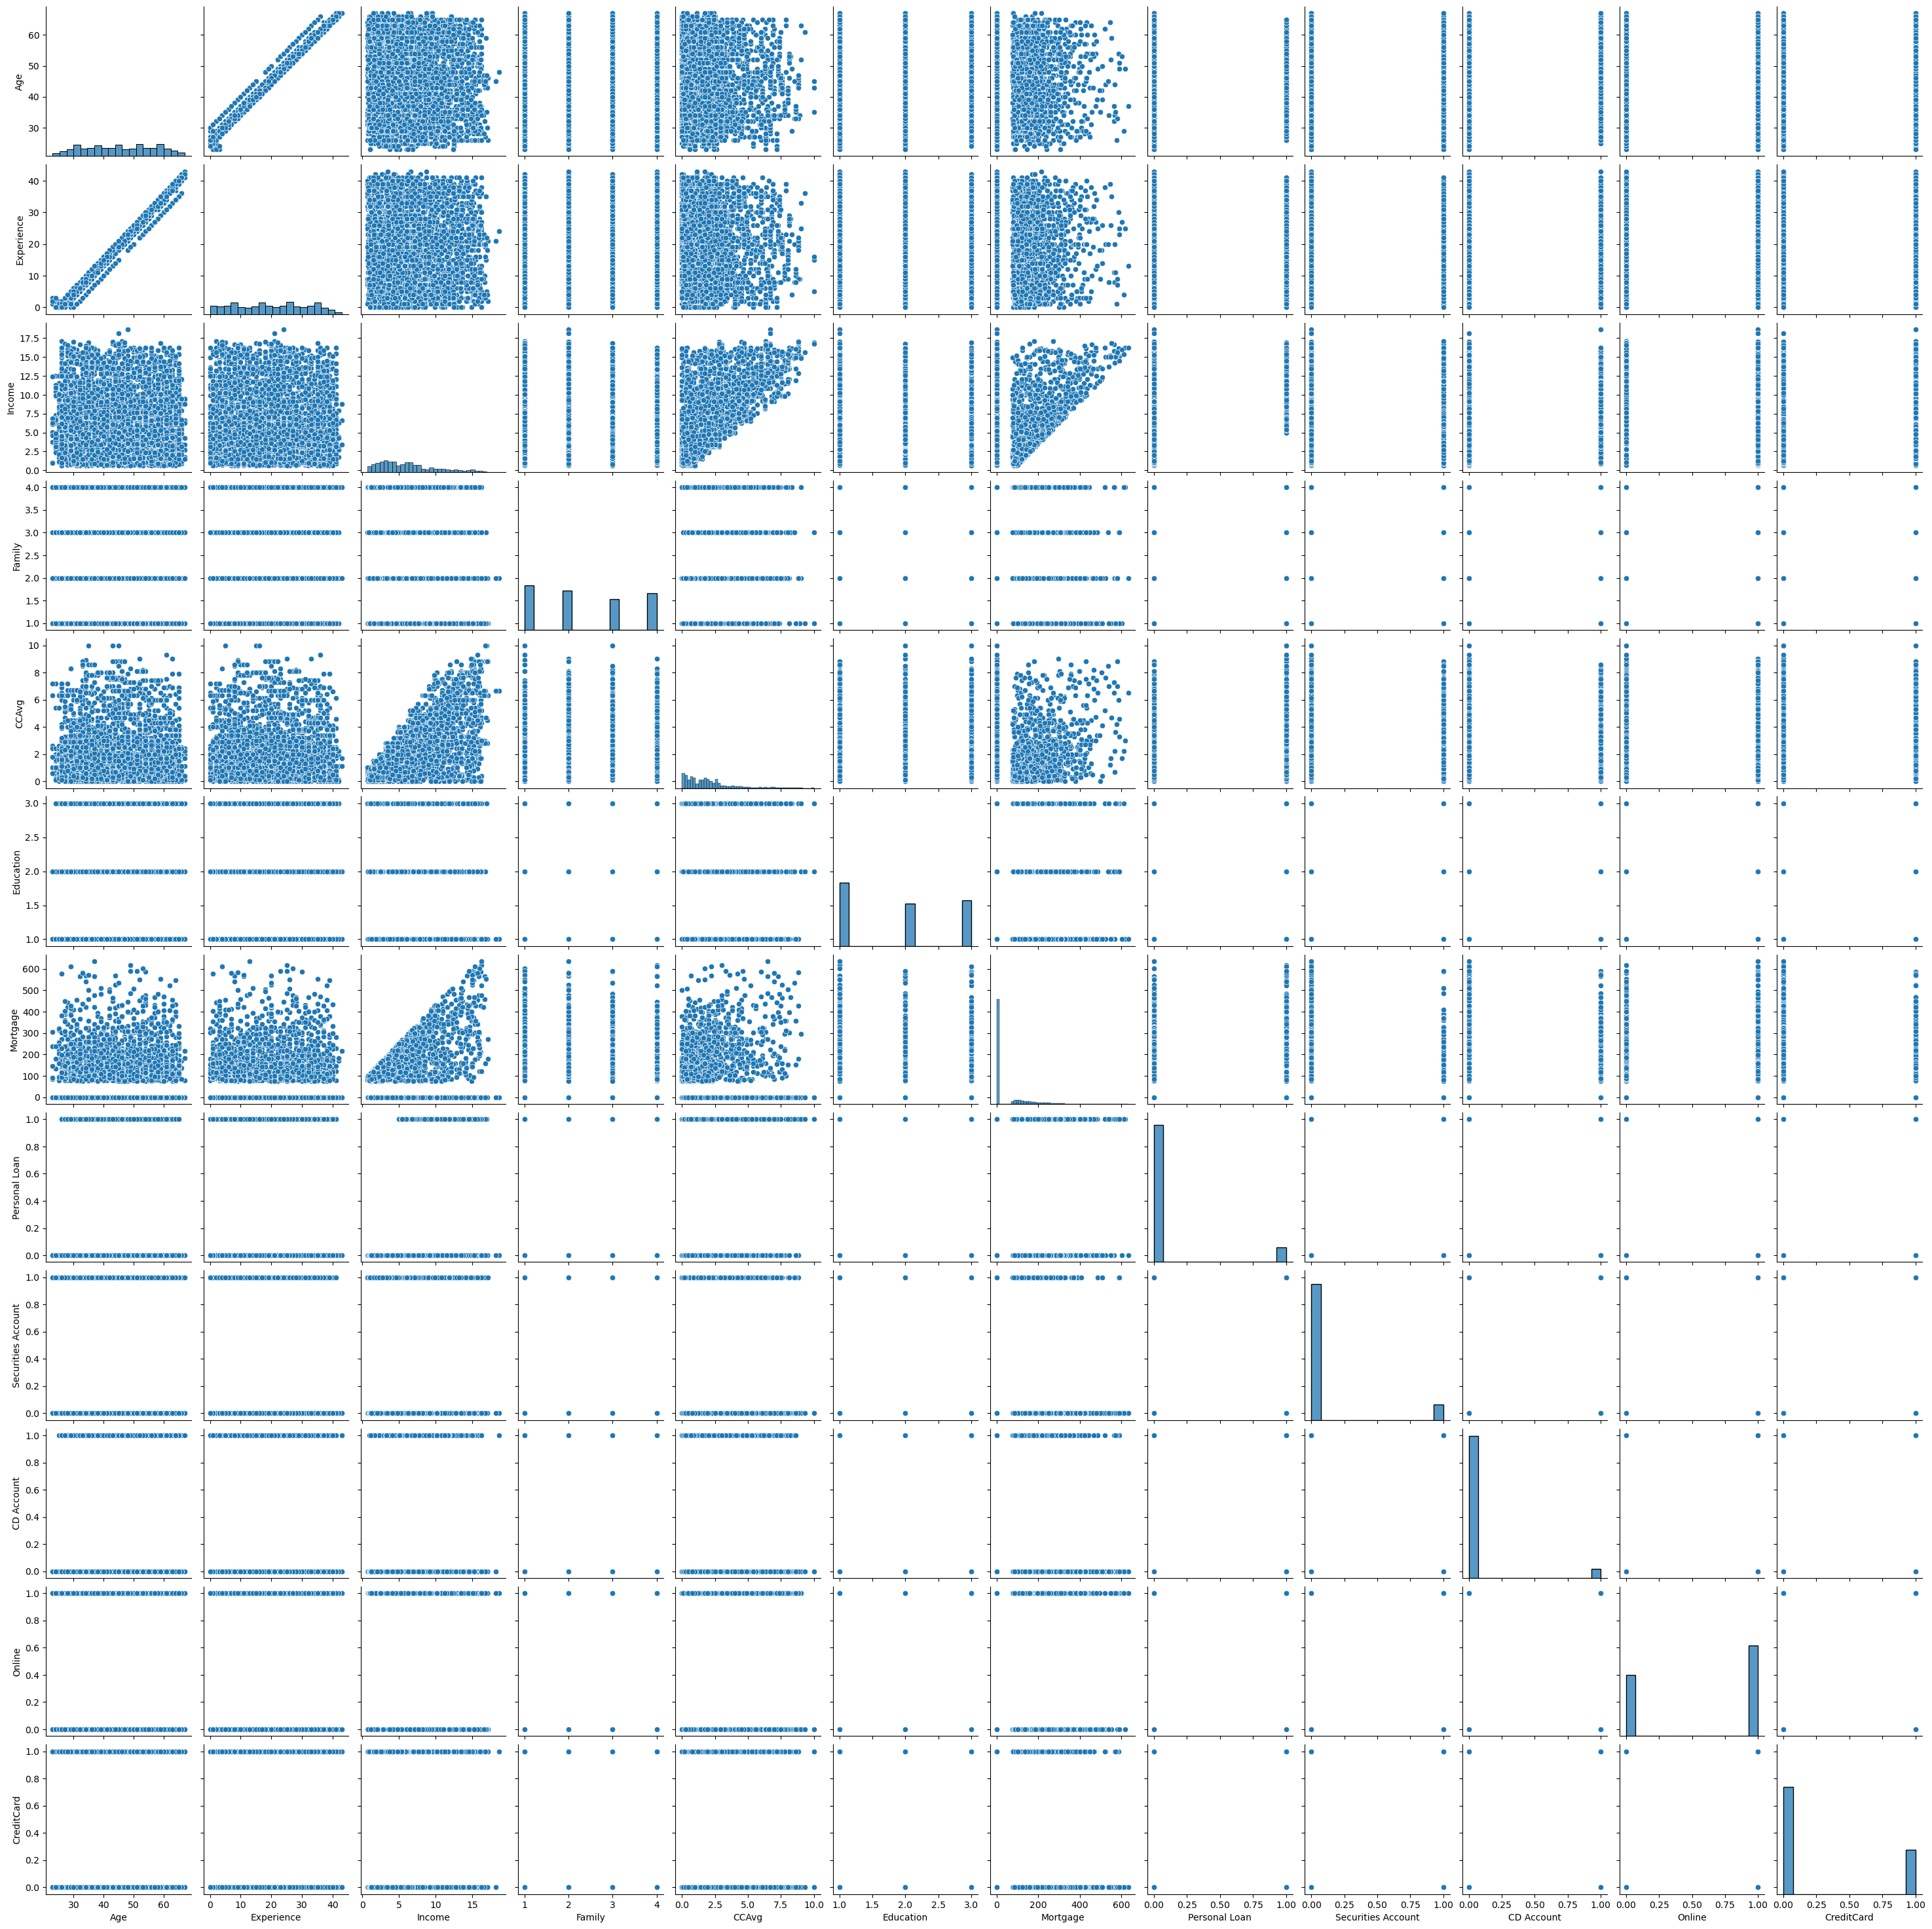

In [15]:
import seaborn as sns
sns.pairplot(dataset)

# To perform Standarization

In [48]:
# spliting the data into input and output

independent = dataset[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage','Securities Account',
       'CD Account', 'Online', 'CreditCard']]
dependent = dataset[['Personal Loan']]

In [49]:
# split the training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(independent, dependent, test_size=1/3, random_state=0)
X_train

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
3276   55          31  13.250       1    3.9          3         0   
3688   51          26  14.917       1    8.1          1         0   
2204   63          37   1.667       2    0.4          1        76   
572    39          15  10.667       1    3.4          1         0   
229    48          24   5.917       2    1.7          1       145   
...   ...         ...     ...     ...    ...        ...       ...   
4931   57          27   4.583       1    1.4          3         0   
3264   67          41   9.500       4    2.4          3         0   
1653   26           1   2.000       2    0.9          3       123   
2607   57          33   4.083       4    1.5          1       214   
2732   33           9   3.167       1    2.1          3       133   

      Securities Account  CD Account  Online  CreditCard  
3276                   0           0       0           0  
3688                   1           0       1           0  
2204                   0           0       0           0  
572                    0           0       0           0  
229                    0           0       0           1  
...                  ...         ...     ...         ...  
4931                   0           0       1           0  
3264                   0           0       1           0  
1653                   0           0       0           1  
2607                   1           1       1           1  
2732                   0           0       0           0  

[3333 rows x 11 columns]

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Loading the preprocessed data into new dataset

In [51]:
dataset.to_csv('Pre_Loan_data.csv',index = False)

In [52]:
dataset = pd.read_csv('Pre_Loan_data.csv')
dataset

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1   4.083       4    1.6          1         0   
1      45          19   2.833       3    1.5          1         0   
2      39          15   0.917       1    1.0          1         0   
3      35           9   8.333       1    2.7          2         0   
4      35           8   3.750       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3   3.333       1    1.9          3         0   
4996   30           4   1.250       4    0.4          1        85   
4997   63          39   2.000       2    0.3          3         0   
4998   65          40   4.083       3    0.5          2         0   
4999   28           4   6.917       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 12 columns]

The above dataset is the final preprocessed data.

# Data Science - Univariate and Bivariate

# 1) - Describing the data.

In [21]:
dataset.describe()

Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.134600     6.147856     2.396400     1.937938   
std      11.463166    11.415189     3.836153     1.147663     1.747659   
min      23.000000     0.000000     0.667000     1.000000     0.000000   
25%      35.000000    10.000000     3.250000     1.000000     0.700000   
50%      45.000000    20.000000     5.333000     2.000000     1.500000   
75%      55.000000    30.000000     8.167000     3.000000     2.500000   
max      67.000000    43.000000    18.667000     4.000000    10.000000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000            0.000000   
25%       1.000000     0.000000       0.000000            0.000000   
50%       2.000000     0.000000       0.000000            0.000000   
75%       3.000000   101.000000       0.000000            0.000000   
max       3.000000   635.000000       1.000000            1.000000   

       CD Account       Online   CreditCard  
count  5000.00000  5000.000000  5000.000000  
mean      0.06040     0.596800     0.294000  
std       0.23825     0.490589     0.455637  
min       0.00000     0.000000     0.000000  
25%       0.00000     0.000000     0.000000  
50%       0.00000     1.000000     0.000000  
75%       0.00000     1.000000     1.000000  
max       1.00000     1.000000     1.000000

#  2) - Creating a table with statistical values.

In [22]:
# import numpy as np

descriptive = pd.DataFrame(index= ["Mean","Median","Mode",'Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR',
                                   '1.5 rule','Lesser Outlier','Greater Outlier','Min','Max'],columns=dataset.columns)
for columnname in dataset.columns: # qual store in colname
    descriptive[columnname]['Mean'] = dataset[columnname].mean()
    descriptive[columnname]['Median'] = dataset[columnname].median()
    descriptive[columnname]['Mode'] = dataset[columnname].mode()[0]
    descriptive[columnname]['Q1:25%'] = dataset.describe()[columnname]["25%"]
    descriptive[columnname]['Q2:50%'] = dataset.describe()[columnname]["50%"]
    descriptive[columnname]['Q3:75%'] = dataset.describe()[columnname]["75%"]
    descriptive[columnname]['99%'] = np.percentile(dataset[columnname],99)
    descriptive[columnname]['Q4:100%'] = dataset.describe()[columnname]["max"]
    #IQR = q3-q1
    descriptive[columnname]['IQR'] = descriptive[columnname]["Q3:75%"]-descriptive[columnname]["Q1:25%"]
    #1.5*iqr
    descriptive[columnname]['1.5 rule'] = 1.5*descriptive[columnname]["IQR"]
    #LessOutlier = q1-1.5*iqr
    descriptive[columnname]['Lesser Outlier'] = descriptive[columnname]['Q1:25%']-descriptive[columnname]['1.5 rule']
    #greaterOutlier = q3+1.5*iqr
    descriptive[columnname]['Greater Outlier'] = descriptive[columnname]['Q3:75%']+descriptive[columnname]['1.5 rule']
    descriptive[columnname]['Min'] = dataset[columnname].min()
    descriptive[columnname]['Max'] = dataset[columnname].max()
descriptive

Age Experience    Income  Family     CCAvg Education  \
Mean             45.3384    20.1346  6.147856  2.3964  1.937938     1.881   
Median              45.0       20.0     5.333     2.0       1.5       2.0   
Mode                  35         32     3.667       1       0.3         1   
Q1:25%              35.0       10.0      3.25     1.0       0.7       1.0   
Q2:50%              45.0       20.0     5.333     2.0       1.5       2.0   
Q3:75%              55.0       30.0     8.167     3.0       2.5       3.0   
99%                 65.0       41.0    16.083     4.0       8.0       3.0   
Q4:100%             67.0       43.0    18.667     4.0      10.0       3.0   
IQR                 20.0       20.0     4.917     2.0       1.8       2.0   
1.5 rule            30.0       30.0    7.3755     3.0       2.7       3.0   
Lesser Outlier       5.0      -20.0   -4.1255    -2.0      -2.0      -2.0   
Greater Outlier     85.0       60.0   15.5425     6.0       5.2       6.0   
Min                   23          0     0.667       1       0.0         1   
Max                   67         43    18.667       4      10.0         3   

                Mortgage Personal Loan Securities Account CD Account  Online  \
Mean             56.4988         0.096             0.1044     0.0604  0.5968   
Median               0.0           0.0                0.0        0.0     1.0   
Mode                   0             0                  0          0       1   
Q1:25%               0.0           0.0                0.0        0.0     0.0   
Q2:50%               0.0           0.0                0.0        0.0     1.0   
Q3:75%             101.0           0.0                0.0        0.0     1.0   
99%               431.01           1.0                1.0        1.0     1.0   
Q4:100%            635.0           1.0                1.0        1.0     1.0   
IQR                101.0           0.0                0.0        0.0     1.0   
1.5 rule           151.5           0.0                0.0        0.0     1.5   
Lesser Outlier    -151.5           0.0                0.0        0.0    -1.5   
Greater Outlier    252.5           0.0                0.0        0.0     2.5   
Min                    0             0                  0          0       0   
Max                  635             1                  1          1       1   

                CreditCard  
Mean                 0.294  
Median                 0.0  
Mode                     0  
Q1:25%                 0.0  
Q2:50%                 0.0  
Q3:75%                 1.0  
99%                    1.0  
Q4:100%                1.0  
IQR                    1.0  
1.5 rule               1.5  
Lesser Outlier        -1.5  
Greater Outlier        2.5  
Min                      0  
Max                      1

# 3) - Checking whether this data contains outlier's or not if present change the outlier to null.

In [23]:
col = dataset.columns

In [24]:
lesser =[]
greater =[]

for columnname in col:
  # Lesser outlier --> Min value should not be less than lesser
    if (descriptive[columnname]["Min"]<descriptive[columnname]["Lesser Outlier"]):
        lesser.append(columnname)
  # Greater outlier --> Max value should not be greater than greater.   
    if (descriptive[columnname]["Max"]>descriptive[columnname]["Greater Outlier"]):
        greater.append(columnname)      

In [25]:
lesser

[]

In [26]:
greater

['Income',
 'CCAvg',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account']

In [27]:
for columnname in greater:
    dataset[columnname][dataset[columnname]>descriptive[columnname]["Greater Outlier"]]=descriptive[columnname]["Greater Outlier"]

C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\741910437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnname][dataset[columnname]>descriptive[columnname]["Greater Outlier"]]=descriptive[columnname]["Greater Outlier"]
C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\741910437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnname][dataset[columnname]>descriptive[columnname]["Greater Outlier"]]=descriptive[columnname]["Greater Outlier"]
C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\741910437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [28]:
import numpy as np

descriptive = pd.DataFrame(index= ["Mean","Median","Mode",'Q1:25%','Q2:50%','Q3:75%','99%','Q4:100%','IQR',
                                   '1.5 rule','Lesser Outlier','Greater Outlier','Min','Max'],columns=dataset.columns)
for columnname in dataset.columns: # qual store in colname
    descriptive[columnname]['Mean'] = dataset[columnname].mean()
    descriptive[columnname]['Median'] = dataset[columnname].median()
    descriptive[columnname]['Mode'] = dataset[columnname].mode()[0]
    descriptive[columnname]['Q1:25%'] = dataset.describe()[columnname]["25%"]
    descriptive[columnname]['Q2:50%'] = dataset.describe()[columnname]["50%"]
    descriptive[columnname]['Q3:75%'] = dataset.describe()[columnname]["75%"]
    descriptive[columnname]['99%'] = np.percentile(dataset[columnname],99)
    descriptive[columnname]['Q4:100%'] = dataset.describe()[columnname]["max"]
    #IQR = q3-q1
    descriptive[columnname]['IQR'] = descriptive[columnname]["Q3:75%"]-descriptive[columnname]["Q1:25%"]
    #1.5*iqr
    descriptive[columnname]['1.5 rule'] = 1.5*descriptive[columnname]["IQR"]
    #LessOutlier = q1-1.5*iqr
    descriptive[columnname]['Lesser Outlier'] = descriptive[columnname]['Q1:25%']-descriptive[columnname]['1.5 rule']
    #greaterOutlier = q3+1.5*iqr
    descriptive[columnname]['Greater Outlier'] = descriptive[columnname]['Q3:75%']+descriptive[columnname]['1.5 rule']
    descriptive[columnname]['Min'] = dataset[columnname].min()
    descriptive[columnname]['Max'] = dataset[columnname].max()
descriptive

Age Experience    Income  Family     CCAvg Education  \
Mean             45.3384    20.1346  6.134805  2.3964  1.831338     1.881   
Median              45.0       20.0     5.333     2.0       1.5       2.0   
Mode                  35         32   15.5425       1       5.2         1   
Q1:25%              35.0       10.0      3.25     1.0       0.7       1.0   
Q2:50%              45.0       20.0     5.333     2.0       1.5       2.0   
Q3:75%              55.0       30.0     8.167     3.0       2.5       3.0   
99%                 65.0       41.0   15.5425     4.0       5.2       3.0   
Q4:100%             67.0       43.0   15.5425     4.0       5.2       3.0   
IQR                 20.0       20.0     4.917     2.0       1.8       2.0   
1.5 rule            30.0       30.0    7.3755     3.0       2.7       3.0   
Lesser Outlier       5.0      -20.0   -4.1255    -2.0      -2.0      -2.0   
Greater Outlier     85.0       60.0   15.5425     6.0       5.2       6.0   
Min                   23          0     0.667       1       0.0         1   
Max                   67         43   15.5425       4       5.2         3   

                Mortgage Personal Loan Securities Account CD Account  Online  \
Mean             50.4947           0.0                0.0        0.0  0.5968   
Median               0.0           0.0                0.0        0.0     1.0   
Mode                 0.0             0                  0          0       1   
Q1:25%               0.0           0.0                0.0        0.0     0.0   
Q2:50%               0.0           0.0                0.0        0.0     1.0   
Q3:75%             101.0           0.0                0.0        0.0     1.0   
99%                252.5           0.0                0.0        0.0     1.0   
Q4:100%            252.5           0.0                0.0        0.0     1.0   
IQR                101.0           0.0                0.0        0.0     1.0   
1.5 rule           151.5           0.0                0.0        0.0     1.5   
Lesser Outlier    -151.5           0.0                0.0        0.0    -1.5   
Greater Outlier    252.5           0.0                0.0        0.0     2.5   
Min                  0.0             0                  0          0       0   
Max                252.5             0                  0          0       1   

                CreditCard  
Mean                 0.294  
Median                 0.0  
Mode                     0  
Q1:25%                 0.0  
Q2:50%                 0.0  
Q3:75%                 1.0  
99%                    1.0  
Q4:100%                1.0  
IQR                    1.0  
1.5 rule               1.5  
Lesser Outlier        -1.5  
Greater Outlier        2.5  
Min                      0  
Max                      1

In [29]:
lesser =[]
greater =[]

for columnname in col:
  # Lesser outlier --> Min value should not be less than lesser
    if (descriptive[columnname]["Min"]<descriptive[columnname]["Lesser Outlier"]):
        lesser.append(columnname)
  # Greater outlier --> Max value should not be greater than greater.   
    if (descriptive[columnname]["Max"]>descriptive[columnname]["Greater Outlier"]):
        greater.append(columnname)      

In [30]:
greater

[]

Based on analysis 'Income','CCAvg','Mortgage','Personal Loan','Securities Account','CD Account' are greater outlier removed by using condition formula.

In [53]:
dataset['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

# 4) - What is the distribution for Income?

C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\3104157235.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([dataset["Personal Loan"]])


<Axes: ylabel='Density'>

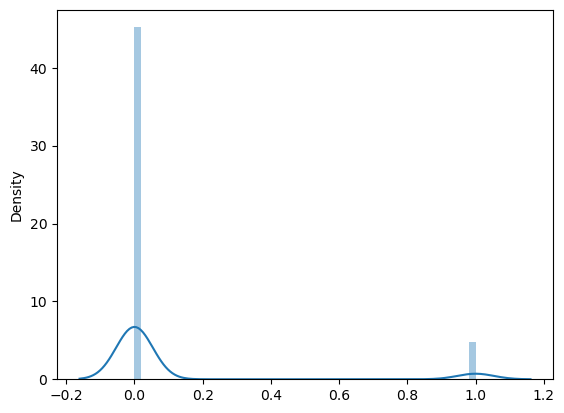

In [54]:
import seaborn as sns
sns.distplot([dataset["Personal Loan"]])

# 5) - Ploting the distribution for all the columns.

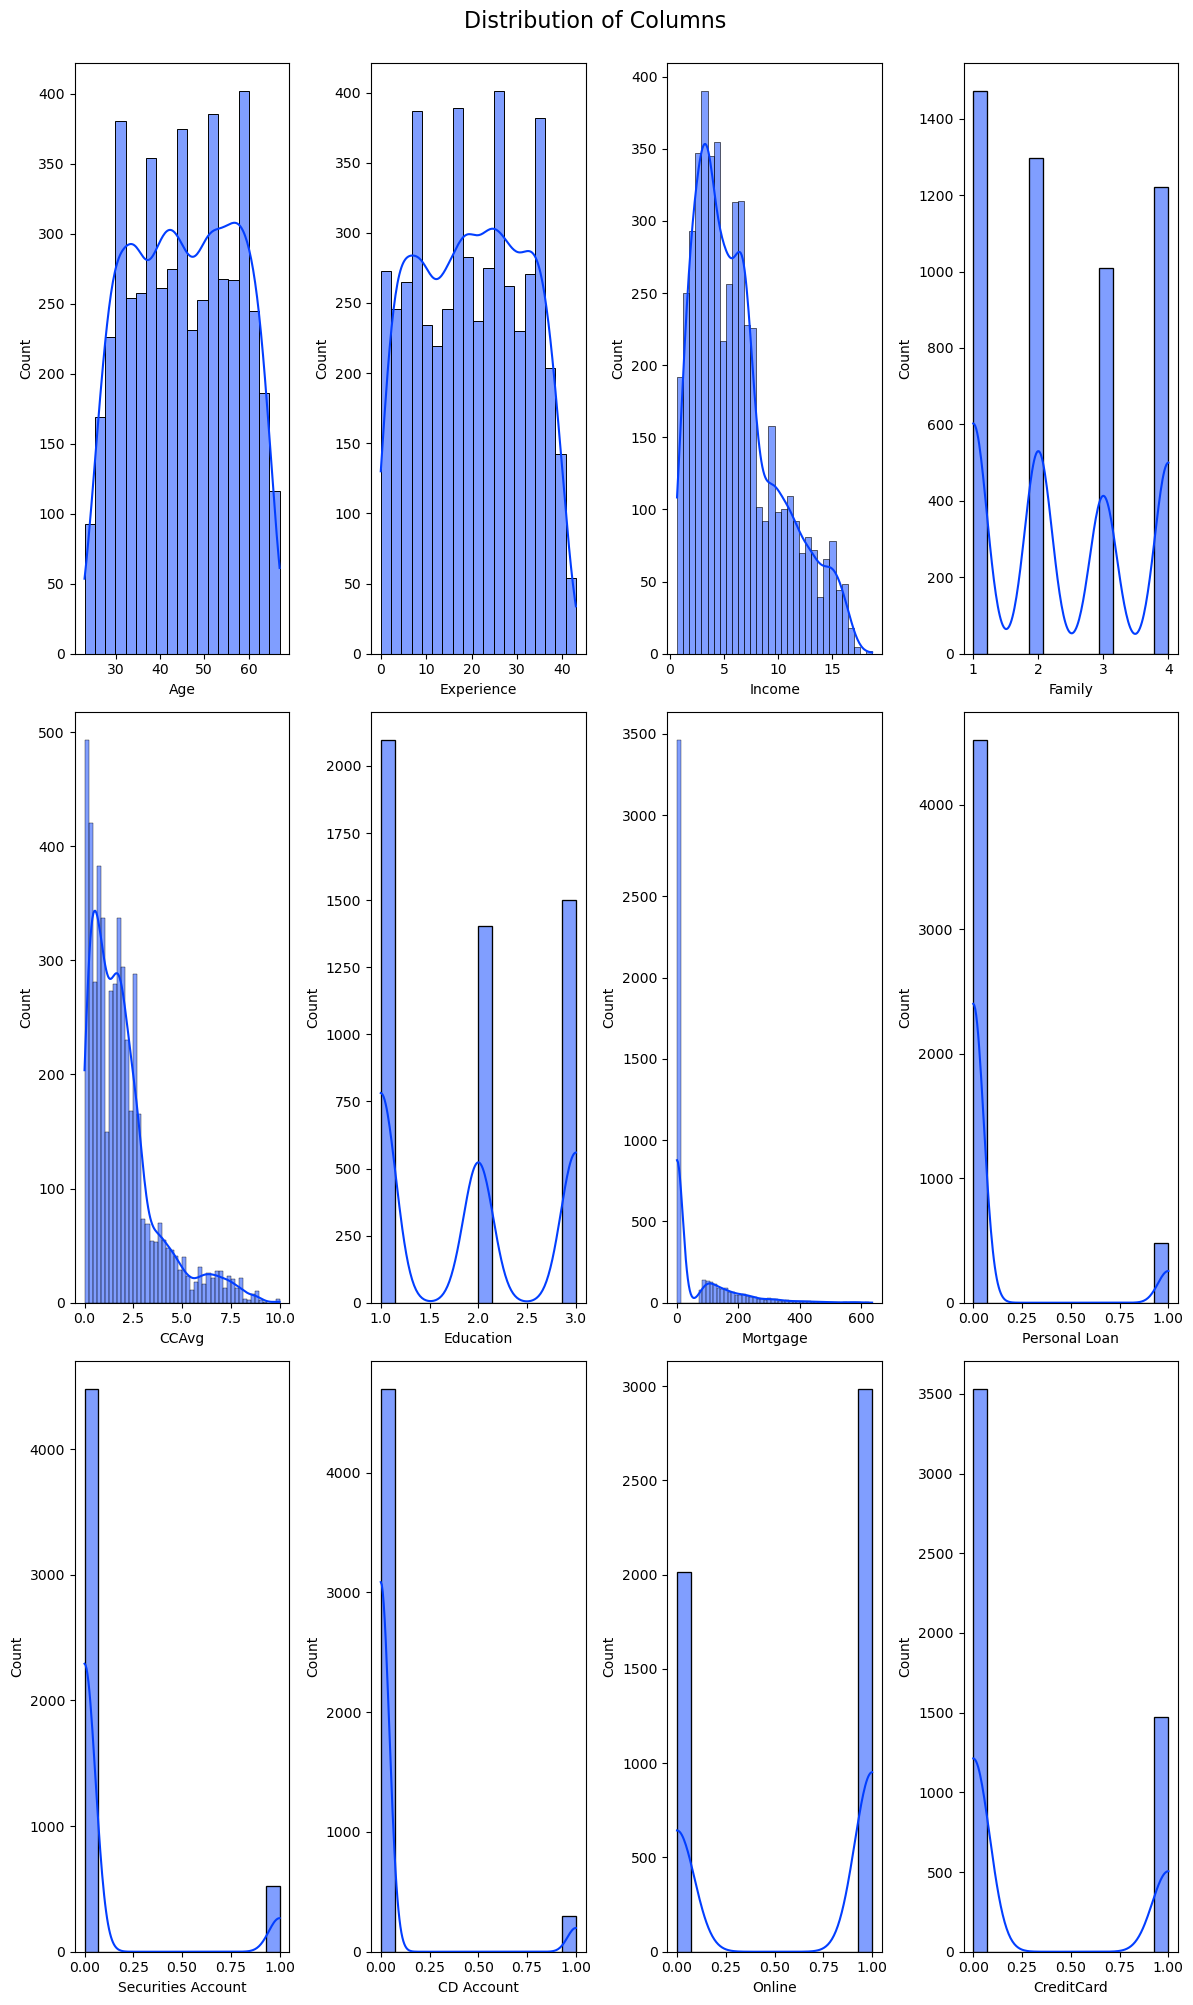

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn palette
sns.set_palette('bright')

# Create subplots for histograms
fig, ax = plt.subplots(3, 4, figsize=(12, 20))

# # Plot histograms with KDE for each column
for i, col in enumerate(dataset.columns):
    sns.histplot(dataset[col], kde=True, ax=ax[i // 4, i % 4])
    
# Set the title of the entire figure
fig.suptitle('Distribution of Columns',y = 1.0, fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# 6) -What is the pdf of personal loan?

C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\3387691332.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  graph = sns.distplot(dataset,kde = True,kde_kws={'color':'red'},color='green')


Mean: 0.096 Std Dev: 0.29462070577616833


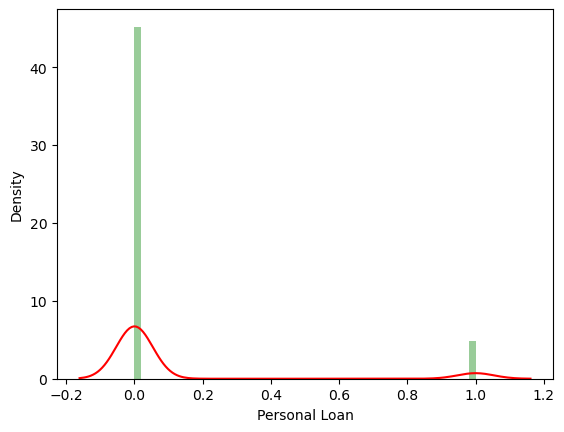

In [56]:
def get_pdf_probability(dataset): # creating a function with dataset,start and end range of the data.
    from matplotlib import pyplot as py # importing lib
    import seaborn as sns
    graph = sns.distplot(dataset,kde = True,kde_kws={'color':'red'},color='green')
    # kde(Kernal density function) - for curve, kde_kws - for color of that curve, colour green is for that histo colour.
    
    #generate a sample mean and std
    sample = dataset
    # to find a mean and std dev
    sample_mean = sample.mean()
    sample_std = sample.std()
#     print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    print("Mean:",sample_mean, "Std Dev:",sample_std)
    #to define normal dist
    from scipy.stats import norm # norm is an inbuilt func need to import library
    dist = norm(sample_mean, sample_std) # to find the normal distribution 
    
get_pdf_probability(dataset['Personal Loan']) # here the column name is ssc_p and start range is 50, end range is 70 
# so the conclusion is nearly 53% of students scored 50 to 70 marks.

Here 0 -> Rejected 
     1 -> Accepted
     
Acceptance of the personal loan offered in the last campaign distribution level.

# 7) - What is the count of Personal Loan?  

In [57]:
counts = dataset['Personal Loan'].value_counts().reset_index()
counts.columns = ['Personal Loan', 'Count']
counts

Personal Loan  Count
0              0   4520
1              1    480

In [58]:
import plotly.express as px
import plotly.io as pl

# Creating the bar plot using Plotly Express
fig = px.bar(counts, x='Personal Loan', y='Count', 
             color = 'Count',
             labels={'Personal Loan': 'Loan Status', 'Count': 'Count'},
             title='Count of Personal Loans')

fig.show()


The above graph shows the count of loan_status(i.e) Accepted and Rejected.
It shows that Rejections are more in last compaign.
Around 4520 people are not accepted the loan and only 480 people are accepted the campaign personal loan.

# 8) - What is the percentage Educated people in this data?

In [59]:
dataset['Education'].value_counts()

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64

In [60]:
import pandas as pd
import plotly.graph_objects as go
# Compute the percentage for each education level
education_counts = dataset['Education'].value_counts(normalize=True) * 100
education_counts = education_counts.sort_index()

# Update labels
labels = ['Undergraduate', 'Graduate', ' Advanced/Professional']
values = education_counts.values

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# Update the title
fig.update_layout(title_text='Percentage based on Education')

# Show the chart
fig.show()



The graph shows that Education level of people in the dataset.
Undergrauate's are more in this data than Graudate and Professionals.

# 9) - Univariate analysis for categorical value/

In [61]:
d_col = ['Family','Education','Personal Loan','Securities Account','CD Account',
       'Online', 'CreditCard']
d_col

['Family',
 'Education',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

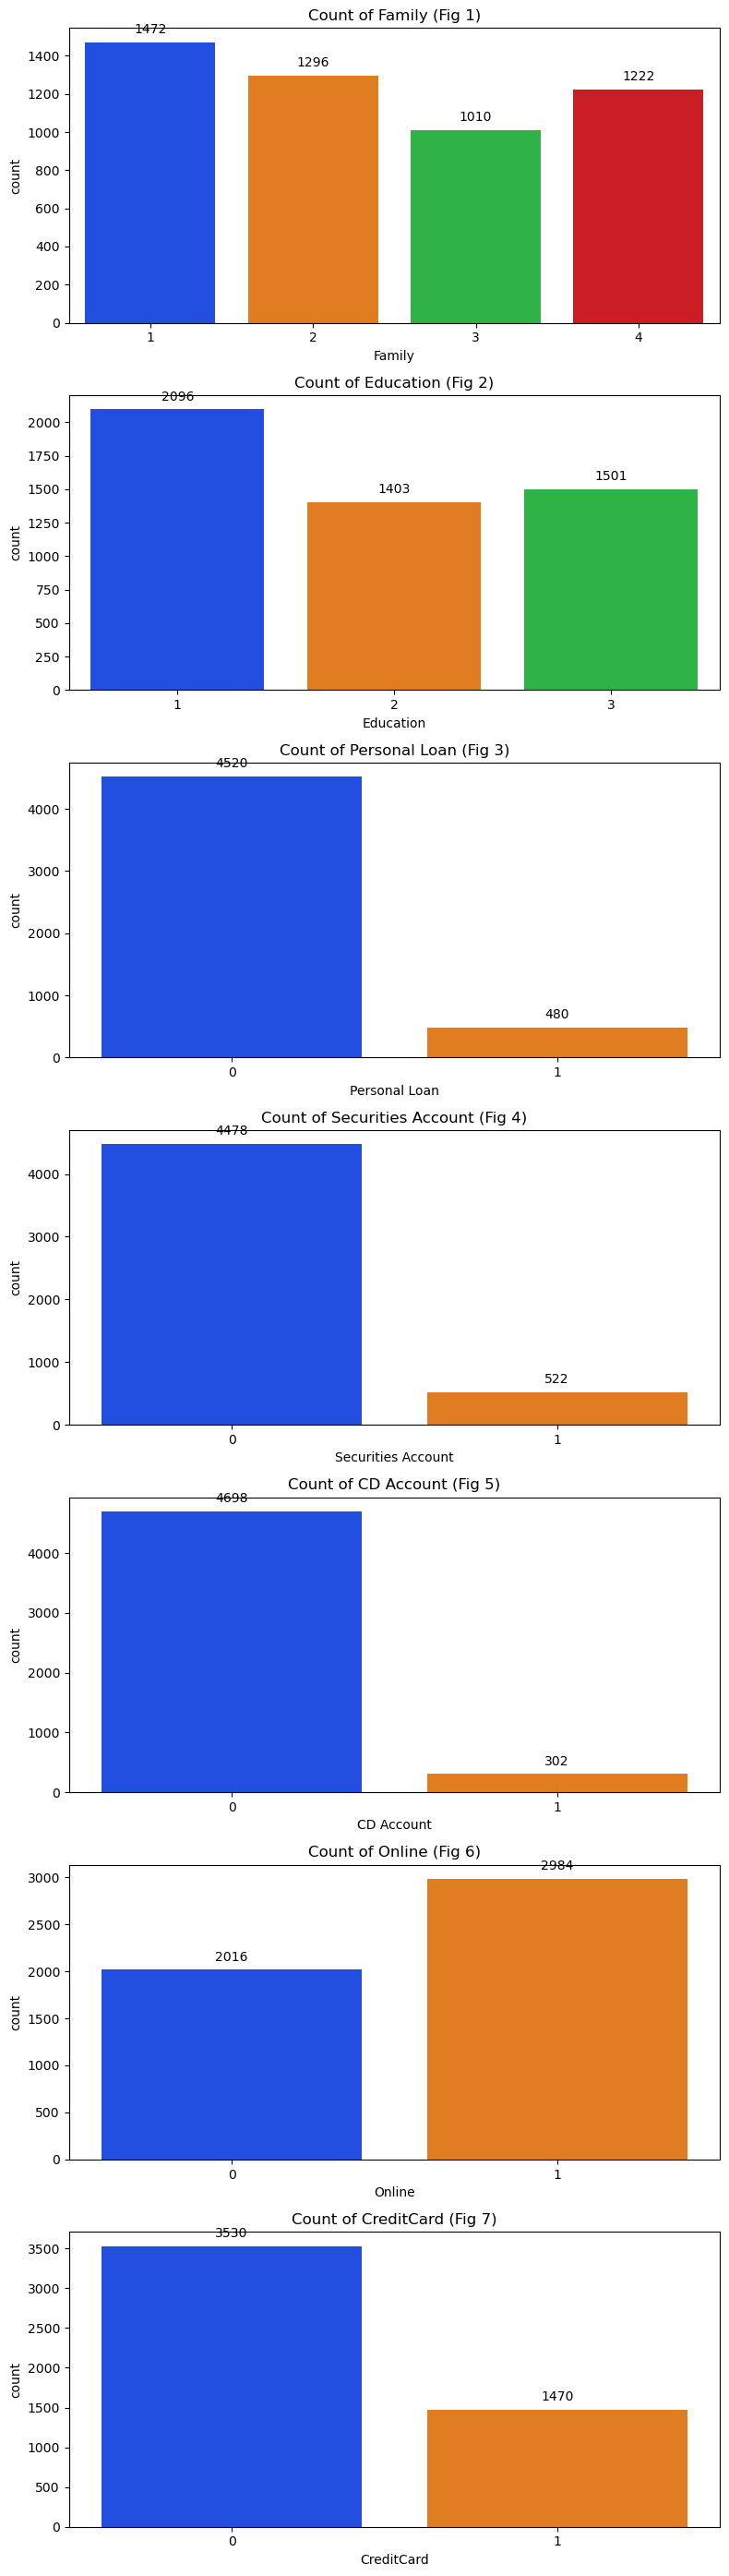

In [62]:
# univariate analysis of categorical data:
sns.set_palette('bright')
fig, ax = plt.subplots(len(d_col),1,figsize =(8, 4*len(d_col)))

for i, col in enumerate(d_col):
    sns.countplot(data=dataset, x=col,ax=ax[i])
    # Set the title of the entire figure
    ax[i].set_title(f'Count of {col} (Fig {i+1})')
    
    # Annotate each bar with its count
    for p in ax[i].patches:
        ax[i].annotate(format(p.get_height(), '.0f'),  # is used to label each bar in the count plot with its count.
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')
plt.tight_layout()  # Ensures plots are properly spaced
plt.show()

The above picture shows the counts of each column:

-- Family : There is high frequency in family members 1 and 2 while comparing 3 and 4. So, family with 1 and 2 members are the more customer in bank.

-- Education : Undergraduate customers are more than Graudate and professionals.

-- Personal loan : Customers who accept personal loan are less than the rejected one.

-- Securities Account : More number customers don't have their Securitiy account.

-- CD account : More number customers don't have their CD account.
-- Online Banking : More number of customers using Online BankingAccount.(internet banking).
-- CreditCard : More number of customers don't use their credit cards.

# 10) - Which Education type customer is more in applying loan? 

In [63]:
Loan_Edu = dataset.groupby(['Education', 'Personal Loan']).size().reset_index(name='Count')
Loan_Edu

Education  Personal Loan  Count
0          1              0   2003
1          1              1     93
2          2              0   1221
3          2              1    182
4          3              0   1296
5          3              1    205

In [64]:
# Update labels
education_labels = {1: 'Undergraduate', 2: 'Graduate', 3: 'Advanced/Professional'}
Loan_Edu['Education'] = Loan_Edu['Education'].map(education_labels)

fig = px.bar(Loan_Edu, 
             x='Education', 
             y='Count', 
             color='Personal Loan', 
             barmode='group',  # barmode='group' groups bars by 'Education'
             labels={'Education': 'Education', 'Count': 'Count', 'Personal Loan': 'Personal Loan'},
             title='Number of Loans by Education')

# Show the plot
fig.show()

In [65]:
dataset['Education'].value_counts().reset_index()

Education  count
0          1   2096
1          3   1501
2          2   1403

The above graph shows the No of Loans by education.

It clearly shows that 

-- Undergraduate data's are more (i.e) 2096 in that acceptance are less around 93.

-- Graduate data is 1430 out of this 1221 where rejected and 182 where accepted.

-- Professional data is around 1501 out of this 1296 rejected and accpetance be 205.

# 11) - Which category people is applying more loan internet bankers or non internet bankers?

In [66]:
dataset['Online'].value_counts()

Online
1    2984
0    2016
Name: count, dtype: int64

In [67]:
Online_Y = dataset[dataset['Online'] == 1]
P_Online_Y = Online_Y.groupby('Personal Loan').size().reset_index(name='Count')
P_Online_Y

Personal Loan  Count
0              0   2693
1              1    291

In [68]:
fig = px.histogram(Online_Y,x ='Personal Loan', 
                   title ='No of Online Bankers applied for Personal loan')
fig.show()

In [69]:
Online_N = dataset[dataset['Online'] == 0]
P_Online_N = Online_N.groupby('Personal Loan').size().reset_index(name='Count')
P_Online_N

Personal Loan  Count
0              0   1827
1              1    189

In [70]:
fig = px.histogram(Online_N,x ='Personal Loan', 
                   title ='No of Non Online Bankers applied for Personal loan')
fig.show()

While Comparing the data Internet banking customers are appling more for personal loan. 

# 12) - What is the distribution of col's based on Personal Loan?

C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\2168111410.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\2168111410.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\2168111410.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




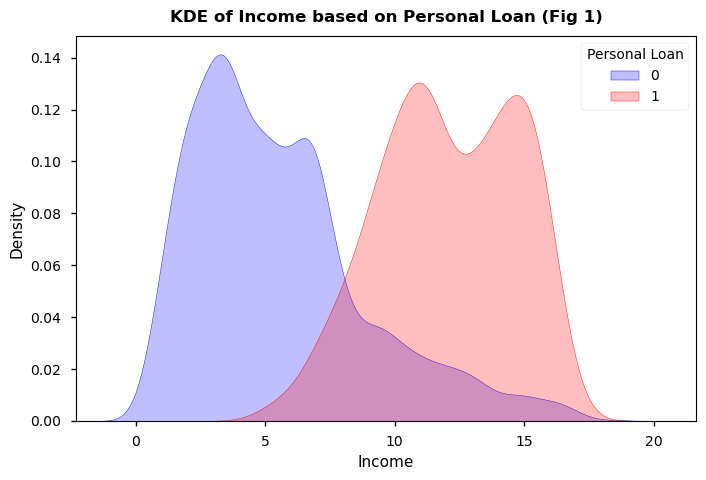

C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\2168111410.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\2168111410.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




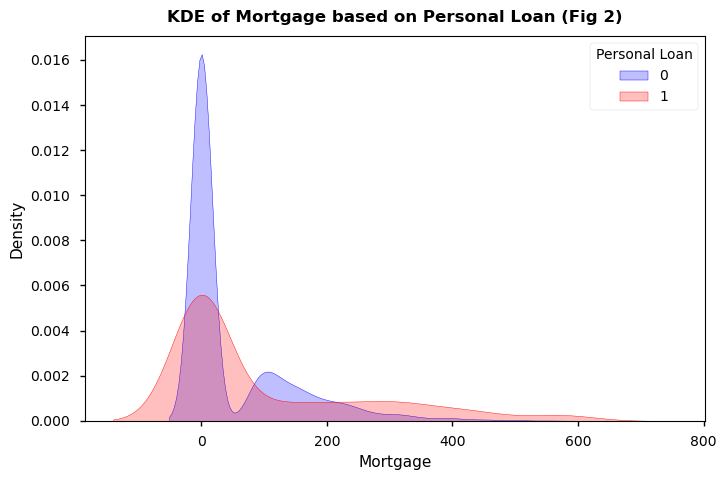

C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\2168111410.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\2168111410.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




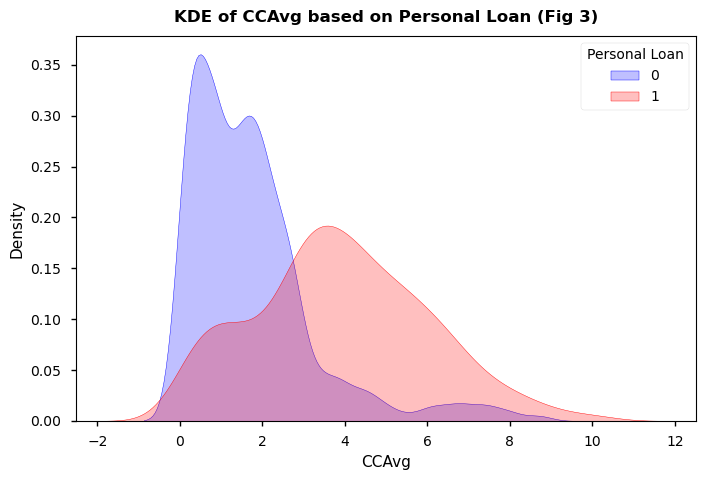

C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\2168111410.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\kathi\AppData\Local\Temp\ipykernel_19952\2168111410.py:16: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




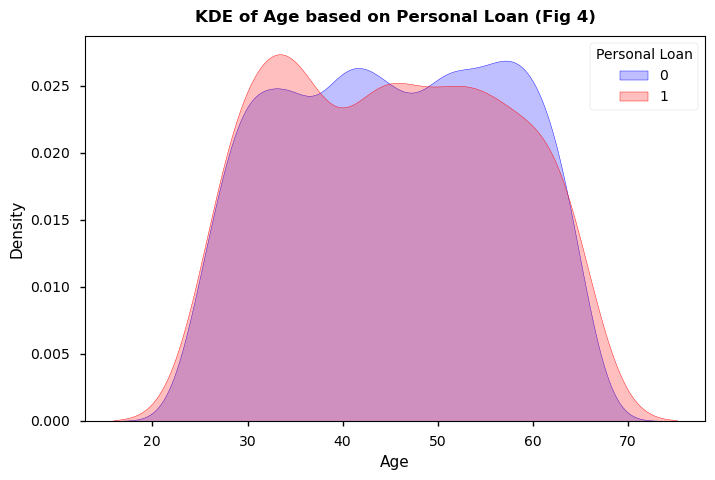

In [71]:
FONT = {'fontsize': 12, 'fontweight': 'bold'}

plt.style.use('seaborn-notebook')
sns.set_palette(['blue', 'red'])

# Columns to plot
columns_to_plot = ['Income', 'Mortgage', 'CCAvg', 'Age']

# Unique values in 'Personal Loan'
personal_loan_status = dataset['Personal Loan'].unique().tolist()

# Iterate over each column to plot
for j, col in enumerate(columns_to_plot):
    plt.figure(figsize=(8, 5))
    for label in personal_loan_status:
        sns.kdeplot(dataset.loc[dataset['Personal Loan'] == label, col], label=label, shade=True)
    plt.title(f'KDE of {col} based on Personal Loan (Fig {j+1})', fontdict=FONT, pad=10)
    plt.legend(title='Personal Loan')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

--> Based on the distribution plot based on income acceptance of loan is little bit higher than the non acceptance.

--> Most people who accepted a bank loan had mortgage euqal to zero.

--> CCAvg distribution is higher in personal loan acceptance while comparing other.

--> Age is not that much important in this data for personal loan acceptance.

# 13) - Find the reason for Loan_Status is not approve of the dataset?

In [72]:
loan_no = dataset[dataset['Personal Loan']==0]
loan_no

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1   4.083       4    1.6          1         0   
1      45          19   2.833       3    1.5          1         0   
2      39          15   0.917       1    1.0          1         0   
3      35           9   8.333       1    2.7          2         0   
4      35           8   3.750       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3   3.333       1    1.9          3         0   
4996   30           4   1.250       4    0.4          1        85   
4997   63          39   2.000       2    0.3          3         0   
4998   65          40   4.083       3    0.5          2         0   
4999   28           4   6.917       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[4520 rows x 12 columns]

In [73]:
loan_yes = dataset[dataset['Personal Loan']==1]
loan_yes

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
9      34           9  15.000       1    8.9          3         0   
16     38          14  10.833       4    4.7          3       134   
18     46          21  16.083       2    8.1          3         0   
29     38          13   9.917       1    3.3          2         0   
38     42          18  11.750       3    5.0          3         0   
...   ...         ...     ...     ...    ...        ...       ...   
4883   38          13  10.750       3    4.1          3         0   
4927   43          19  10.083       1    0.7          2         0   
4941   28           4   9.333       2    1.6          2         0   
4962   46          20  10.167       3    3.0          3         0   
4980   29           5  11.250       3    5.3          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
9                 1                   0           0       0           0  
16                1                   0           0       0           0  
18                1                   0           0       0           0  
29                1                   0           1       1           1  
38                1                   1           1       1           0  
...             ...                 ...         ...     ...         ...  
4883              1                   0           1       1           1  
4927              1                   0           1       1           1  
4941              1                   0           0       1           0  
4962              1                   0           1       1           1  
4980              1                   0           1       1           1  

[480 rows x 12 columns]

In [74]:
loan_yes.describe()

Age  Experience      Income      Family       CCAvg   Education  \
count  480.000000  480.000000  480.000000  480.000000  480.000000  480.000000   
mean    45.066667   19.843750   12.062175    2.612500    3.905354    2.233333   
std     11.590964   11.582443    2.632042    1.115393    2.097681    0.753373   
min     26.000000    0.000000    5.000000    1.000000    0.000000    1.000000   
25%     35.000000    9.000000   10.167000    2.000000    2.600000    2.000000   
50%     45.000000   20.000000   11.875000    3.000000    3.800000    2.000000   
75%     55.000000   30.000000   14.333000    4.000000    5.347500    3.000000   
max     65.000000   41.000000   16.917000    4.000000   10.000000    3.000000   

         Mortgage  Personal Loan  Securities Account  CD Account     Online  \
count  480.000000          480.0          480.000000  480.000000  480.00000   
mean   100.845833            1.0            0.125000    0.291667    0.60625   
std    160.847862            0.0            0.331064    0.455004    0.48909   
min      0.000000            1.0            0.000000    0.000000    0.00000   
25%      0.000000            1.0            0.000000    0.000000    0.00000   
50%      0.000000            1.0            0.000000    0.000000    1.00000   
75%    192.500000            1.0            0.000000    1.000000    1.00000   
max    617.000000            1.0            1.000000    1.000000    1.00000   

       CreditCard  
count  480.000000  
mean     0.297917  
std      0.457820  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

In [75]:
loan_no.describe()

Age   Experience       Income       Family        CCAvg  \
count  4520.000000  4520.000000  4520.000000  4520.000000  4520.000000   
mean     45.367257    20.165487     5.519787     2.373451     1.729009   
std      11.450427    11.398146     3.381552     1.148771     1.567647   
min      23.000000     0.000000     0.667000     1.000000     0.000000   
25%      35.000000    10.000000     2.917000     1.000000     0.600000   
50%      45.000000    20.000000     4.917000     2.000000     1.400000   
75%      55.000000    30.000000     7.000000     3.000000     2.300000   
max      67.000000    43.000000    18.667000     4.000000     8.800000   

         Education     Mortgage  Personal Loan  Securities Account  \
count  4520.000000  4520.000000         4520.0         4520.000000   
mean      1.843584    51.789381            0.0            0.102212   
std       0.839975    92.038931            0.0            0.302961   
min       1.000000     0.000000            0.0            0.000000   
25%       1.000000     0.000000            0.0            0.000000   
50%       2.000000     0.000000            0.0            0.000000   
75%       3.000000    98.000000            0.0            0.000000   
max       3.000000   635.000000            0.0            1.000000   

        CD Account       Online   CreditCard  
count  4520.000000  4520.000000  4520.000000  
mean      0.035841     0.595796     0.293584  
std       0.185913     0.490792     0.455454  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     1.000000     0.000000  
75%       0.000000     1.000000     1.000000  
max       1.000000     1.000000     1.000000

Based on the analysis average Income, CCAvg, Mortgage, CD Account of Personal Loan accpetance is higher while comparing.

# 12) - What kind of relation between Income and Personal Loan?

In [76]:
dataset.corr()

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.993991 -0.055269 -0.046418 -0.052012   
Experience          0.993991    1.000000 -0.046876 -0.051851 -0.049738   
Income             -0.055269   -0.046876  1.000000 -0.157502  0.645983   
Family             -0.046418   -0.051851 -0.157502  1.000000 -0.109275   
CCAvg              -0.052012   -0.049738  0.645983 -0.109275  1.000000   
Education           0.041334    0.013919 -0.187524  0.064929 -0.136124   
Mortgage           -0.012539   -0.011097  0.206804 -0.020445  0.109905   
Personal Loan      -0.007726   -0.008304  0.502463  0.061367  0.366889   
Securities Account -0.000436   -0.000989 -0.002616  0.019994  0.015086   
CD Account          0.008043    0.009735  0.169737  0.014110  0.136534   
Online              0.013702    0.014051  0.014204  0.010354 -0.003611   
CreditCard          0.007681    0.008851 -0.002385  0.011588 -0.006689   

                    Education  Mortgage  Personal Loan  Securities Account  \
Age                  0.041334 -0.012539      -0.007726           -0.000436   
Experience           0.013919 -0.011097      -0.008304           -0.000989   
Income              -0.187524  0.206804       0.502463           -0.002616   
Family               0.064929 -0.020445       0.061367            0.019994   
CCAvg               -0.136124  0.109905       0.366889            0.015086   
Education            1.000000 -0.033327       0.136722           -0.010812   
Mortgage            -0.033327  1.000000       0.142095           -0.005411   
Personal Loan        0.136722  0.142095       1.000000            0.021954   
Securities Account  -0.010812 -0.005411       0.021954            1.000000   
CD Account           0.013934  0.089311       0.316355            0.317034   
Online              -0.015004 -0.005995       0.006278            0.012627   
CreditCard          -0.011014 -0.007231       0.002802           -0.015028   

                    CD Account    Online  CreditCard  
Age                   0.008043  0.013702    0.007681  
Experience            0.009735  0.014051    0.008851  
Income                0.169737  0.014204   -0.002385  
Family                0.014110  0.010354    0.011588  
CCAvg                 0.136534 -0.003611   -0.006689  
Education             0.013934 -0.015004   -0.011014  
Mortgage              0.089311 -0.005995   -0.007231  
Personal Loan         0.316355  0.006278    0.002802  
Securities Account    0.317034  0.012627   -0.015028  
CD Account            1.000000  0.175880    0.278644  
Online                0.175880  1.000000    0.004210  
CreditCard            0.278644  0.004210    1.000000

Here, the question is to find the relationship b/w Income and Personalloan so need to find correlation.

The correlation b/w LoanAmount and ApplicantIncome is 0.502463, it is a positive correlation, but low degree +ve correlation.


# 13) - What is the min and max Income of a customer?

In [77]:
Minimum_income = dataset['Income'].min()
print("Minimum Income :",Minimum_income)

Minimum Income : 0.667


In [78]:
Maximum_income = dataset['Income'].max()
print("Maximum Income :",Maximum_income)

Maximum Income : 18.667


Here the minimum income of a customer per month is 0.667 dollar & Maximum income of a customer per month is 18.667 dollar. 

# 14) - Test the Analysis of variance between Income and Personal Loan at signifance level 5%.(Make a decision using hypothesis testing)

In [79]:
from scipy import stats
stats.f_oneway(dataset['Income'],dataset['Personal Loan'])

F_onewayResult(statistic=12370.899095724802, pvalue=0.0)

H0 - There is no significant difference b/w Income and Personal Loan.

H1 - There is significant difference b/w Income and Personal Loan.

There is a condition (i.e) (p< 0.05) --> remove null else remove alternate hypothesis

Here, the p value is 0.0, probability value is lesser than 0.05 so it will reject the null hypothesis.

Hence it is a alternate hypothesis, so it comes under H1.

# 15) - Which is highly correlated with Personal Loan?

<Axes: >

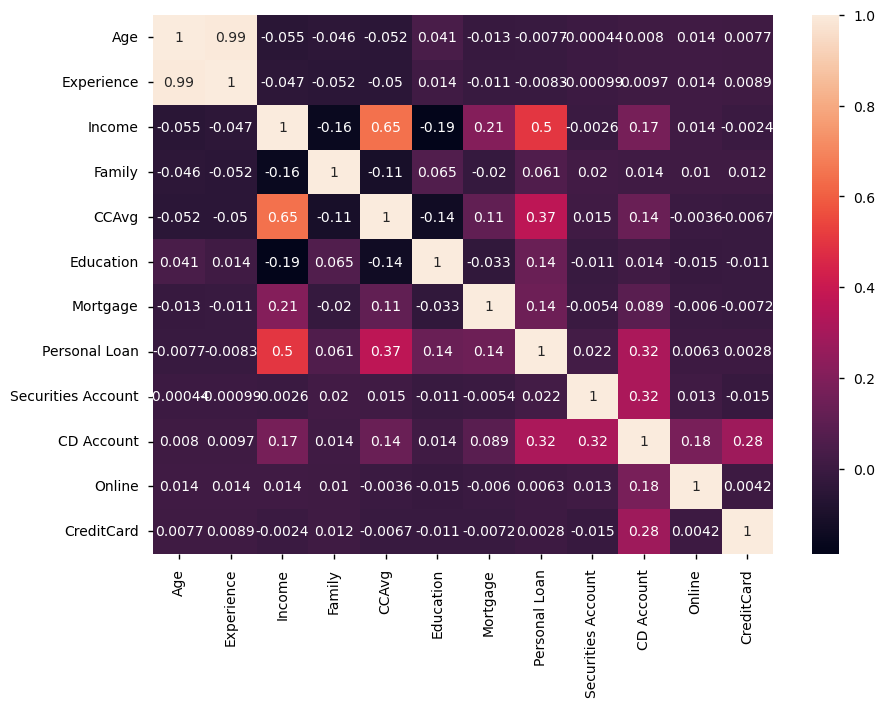

In [80]:
import seaborn as sns
plt.figure(figsize=(10,7))
corr_mat = dataset.corr()
sns.heatmap(corr_mat, annot=True)

Income is highly correlated with Personal Loan while comparing other.

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



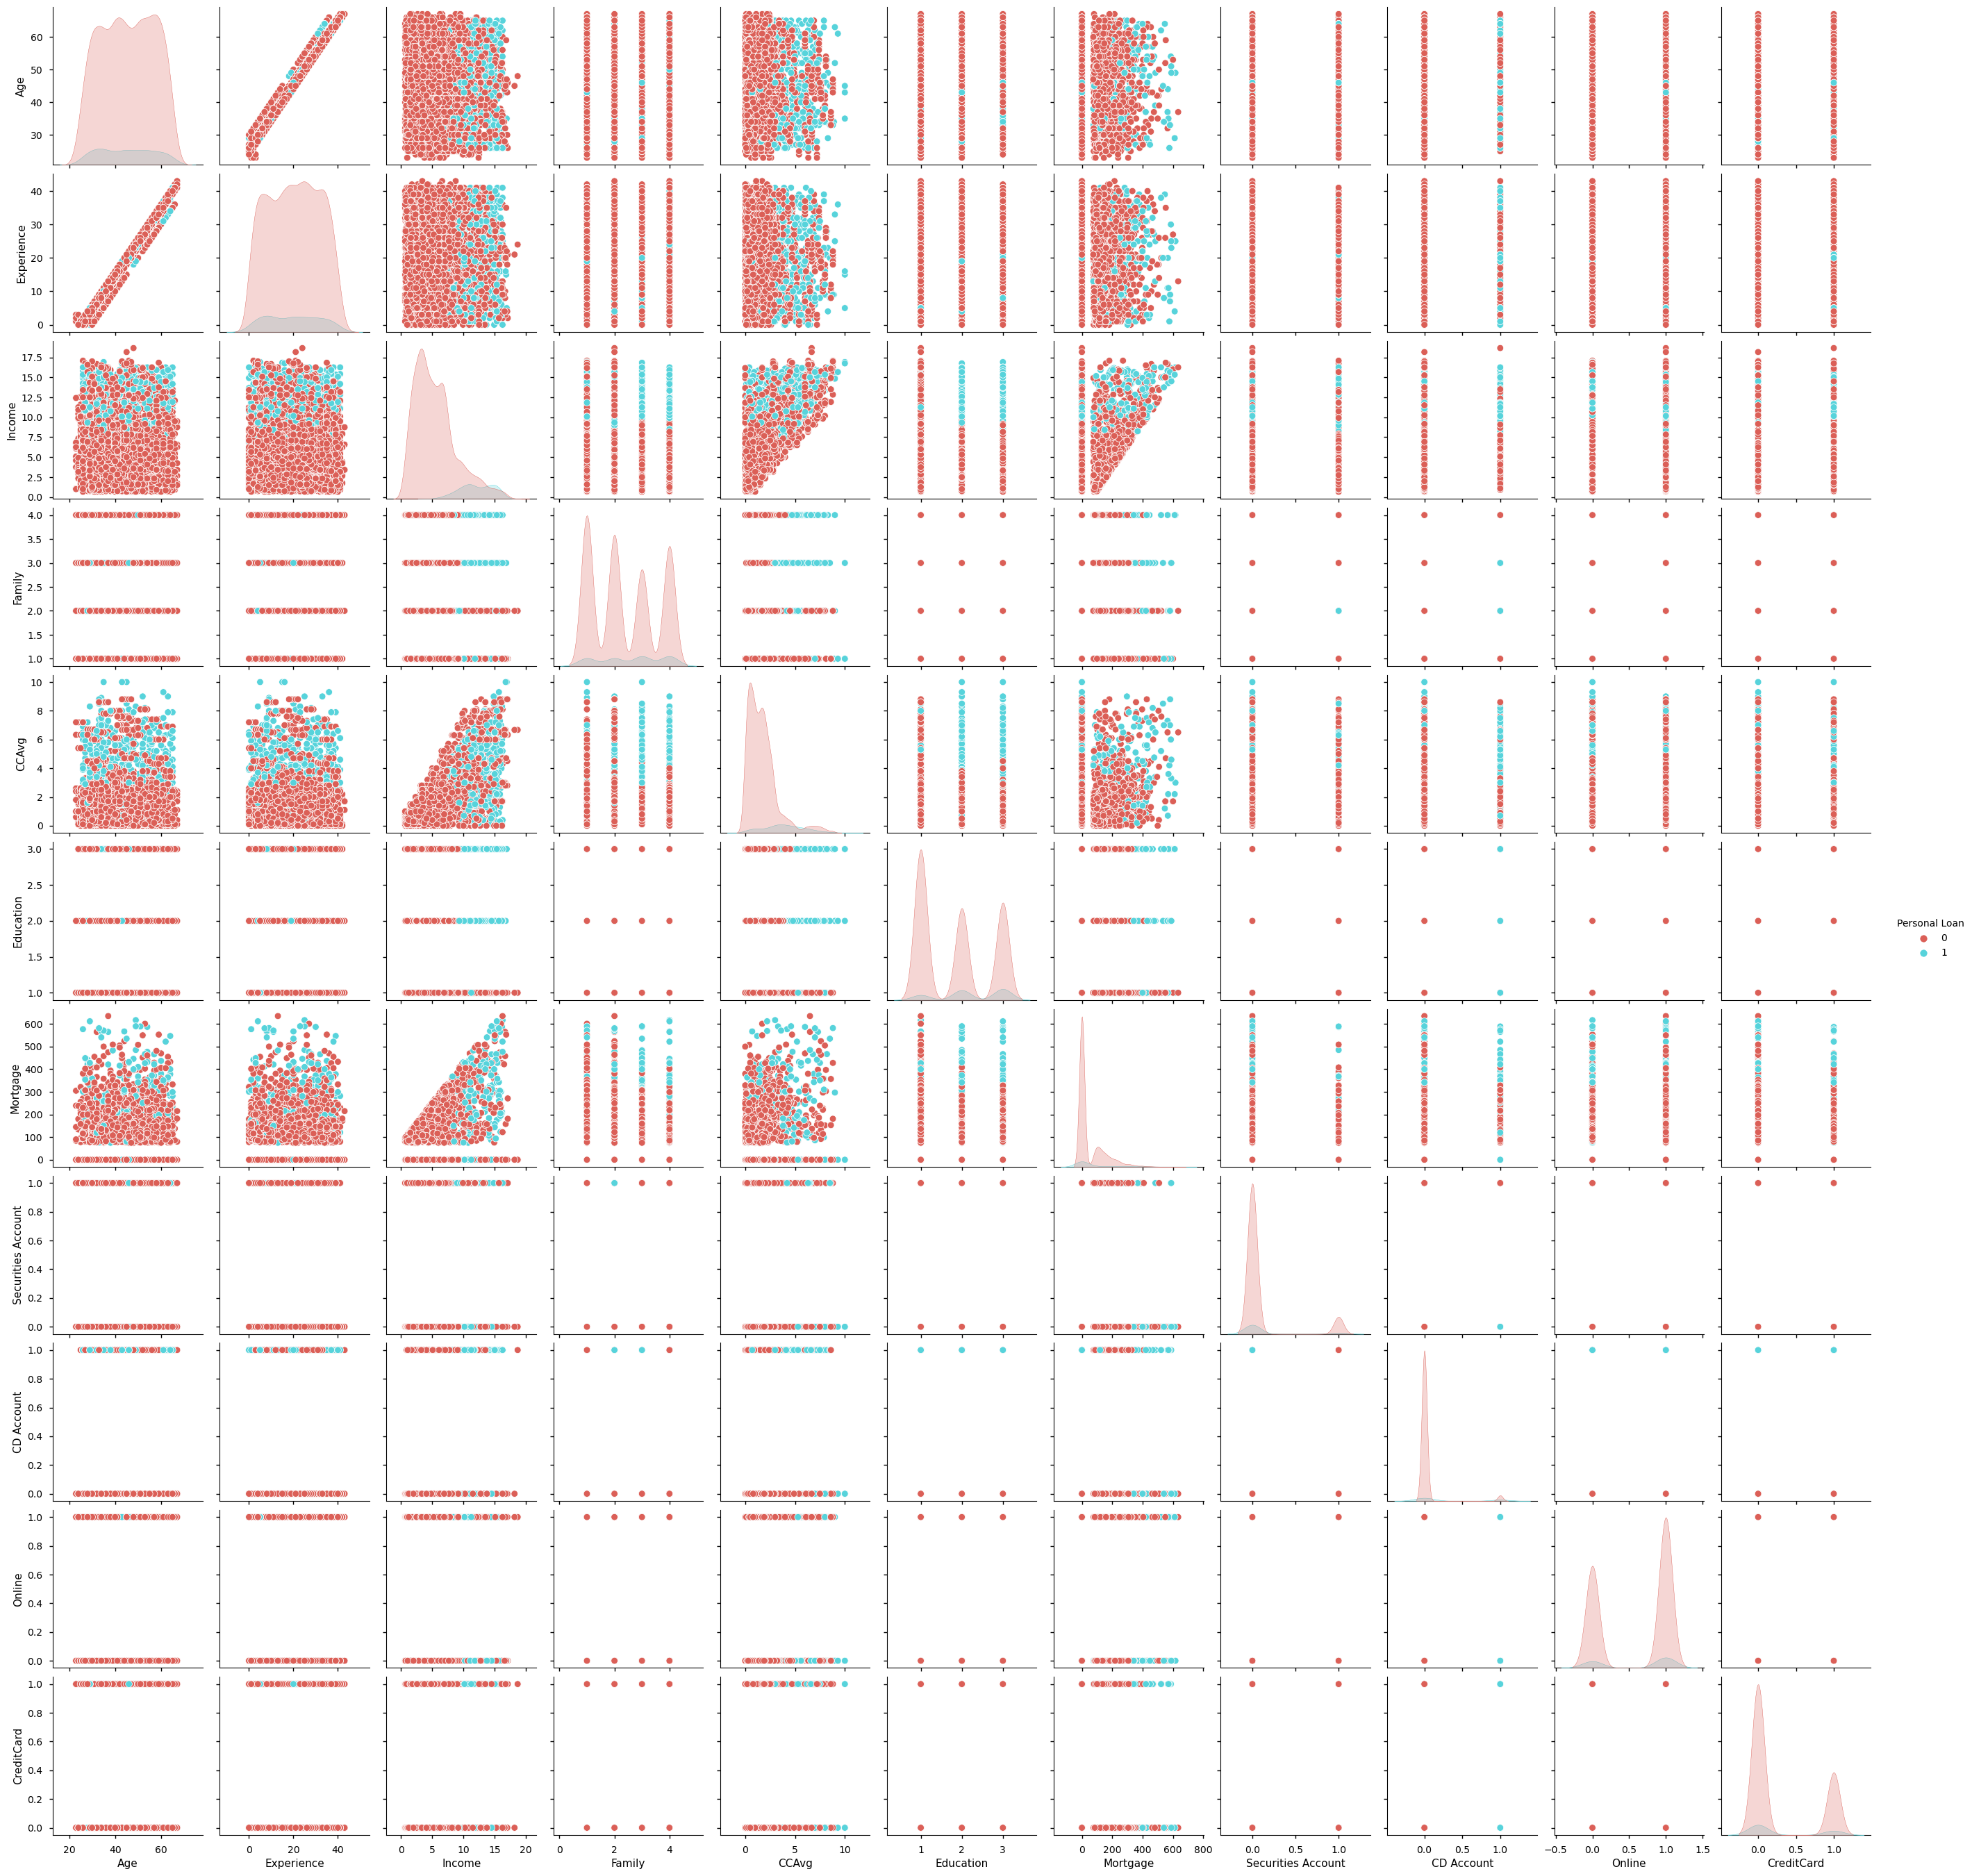

In [81]:
import seaborn as sns
sns.pairplot(dataset, hue ='Personal Loan', kind ='scatter', diag_kind='kde',palette ='hls')


# Feature Selection and Model Creation

By using this dataset, did research on feature selection, based on that RFE(Recursive Feature Elimination) gives a Better result so developed a model by using 9 feature in Random Forest Classifier.

In [82]:
# RFE
def rfefeature(indep_X,dep_Y,n):
    rfelist =[]
    selected_features = {}

    log_model = LogisticRegression(solver='lbfgs')
    svm_model = SVC(kernel='linear',random_state =0)
    dt_model = DecisionTreeClassifier(criterion ='gini',max_features ='sqrt',splitter ='best',random_state =0)
    rf_model = RandomForestClassifier(n_estimators =10, criterion ='entropy', random_state =0)
#     nb_model = GaussianNB(priors=None)
    rfemodellist = [log_model,svm_model,dt_model,rf_model]
    for model in rfemodellist:
        print(model)
        # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
        log_rfe = RFE(estimator=model, n_features_to_select=n)
        print(log_rfe)
        log_fit = log_rfe.fit(indep_X,dep_Y)
        log_rfe_feature= log_fit.transform(indep_X)
        selected_columns = indep_X.columns[log_rfe.support_].tolist()
        selected_features[model.__class__.__name__] = selected_columns
        rfelist.append(log_rfe_feature)
    return rfelist,selected_features

In [83]:
def split_scalar(indep_X,dep_Y):
    X_train,X_test,Y_train,Y_test = train_test_split(indep_X,dep_Y,test_size=0.30,random_state=0)
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train,X_test,Y_train,Y_test

In [84]:
def cm_pred(classifier,X_test):
    test_pred = classifier.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y_test,test_pred)
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report
    
    accuracy = accuracy_score(Y_test,test_pred)
    
    report = classification_report(Y_test,test_pred)
    return classifier,accuracy,report,X_test,Y_test,cm

In [85]:
def log(X_train,X_test,Y_train):
    classifier = LogisticRegression(random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

def svm(X_train,X_test,Y_train):
    classifier = SVC(kernel='linear',random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

def dtree(X_train,X_test,Y_train):
    classifier = DecisionTreeClassifier(criterion ='gini',max_features ='sqrt',splitter ='best',random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

def random(X_train,X_test,Y_train):
    classifier =RandomForestClassifier(n_estimators =10, criterion ='entropy', random_state =0)
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

def nb(X_train,X_test,Y_train):
    classifier = GaussianNB()
    classifier.fit(X_train,Y_train)
    classifier,accuracy,report,X_test,Y_test,cm = cm_pred(classifier,X_test)
    return classifier,accuracy,report,X_test,Y_test,cm

def knn(X_train,X_test,Y_train):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(X_train, Y_train)
    classifier,accuracy,report,X_test,Y_test,cm=cm_pred(classifier,X_test)
    return  classifier,accuracy,report,X_test,Y_test,cm

In [86]:
def rfe_classification(acclog,accsvm,accdtree,accrandom,accnb,accknn):
    rfe_df =pd.DataFrame(index =['Logistic','SVM','DecisionTree','RandomForest',],columns = ['Logistic','SVM','DecisionTree','RandomForest','NavieBayes','KNN'])
    for number,idex in enumerate(rfe_df.index):
        rfe_df['Logistic'][idex]=acclog[number]
        rfe_df['SVM'][idex]=accsvm[number]
        rfe_df['DecisionTree'][idex]=accdtree[number]
        rfe_df['RandomForest'][idex]=accrandom[number]
        rfe_df['NavieBayes'][idex]=accnb[number]
        rfe_df['KNN'][idex]=accknn[number]

    return rfe_df

In [87]:
indep_X = dataset.drop('Personal Loan',axis =1)
dep_Y = dataset['Personal Loan']
rfelist,selected_features= rfefeature(indep_X,dep_Y,9)
acclog=[]
accsvm=[]
accdtree=[]
accrandom=[]
accnb=[]
accknn=[]

for i in rfelist:
    X_train,X_test,Y_train,Y_test = split_scalar(i,dep_Y)
    classifier,accuracy,report,X_test,Y_test,cm =log(X_train,X_test,Y_train)
    acclog.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =svm(X_train,X_test,Y_train)
    accsvm.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =dtree(X_train,X_test,Y_train)
    accdtree.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =random(X_train,X_test,Y_train)
    accrandom.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =nb(X_train,X_test,Y_train)
    accnb.append(accuracy)
    classifier,accuracy,report,X_test,Y_test,cm =knn(X_train,X_test,Y_train)
    accknn.append(accuracy)
    
result = rfe_classification(acclog,accsvm,accdtree,accrandom,accnb,accknn)
result


LogisticRegression()
RFE(estimator=LogisticRegression(), n_features_to_select=9)
SVC(kernel='linear', random_state=0)
RFE(estimator=SVC(kernel='linear', random_state=0), n_features_to_select=9)


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460:

DecisionTreeClassifier(max_features='sqrt', random_state=0)
RFE(estimator=DecisionTreeClassifier(max_features='sqrt', random_state=0),
    n_features_to_select=9)
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
RFE(estimator=RandomForestClassifier(criterion='entropy', n_estimators=10,
                                     random_state=0),
    n_features_to_select=9)


Logistic       SVM DecisionTree RandomForest NavieBayes  \
Logistic      0.956667  0.957333        0.966         0.98      0.924   
SVM           0.954667     0.954        0.984     0.983333   0.898667   
DecisionTree  0.950667  0.950667        0.982     0.988667   0.887333   
RandomForest  0.950667  0.950667        0.982     0.988667   0.887333   

                   KNN  
Logistic         0.974  
SVM               0.97  
DecisionTree  0.967333  
RandomForest  0.967333

Random Forest classifier gives better accuracy than other using 9 features.

In [88]:
print("Selected Features:")
for model_name, features in selected_features.items():
    print(f"{model_name}: {features}")

Selected Features:
LogisticRegression: ['Age', 'Experience', 'Income', 'Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
SVC: ['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
DecisionTreeClassifier: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'Online']
RandomForestClassifier: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'Online']


The above output shows the columns of 9 with algorithms.

# Random Forest classifier

In [89]:
#Model Creation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[10,50,100], 
              'criterion':['gini', 'entropy', 'log_loss'],# paramters are random forest from website
              'max_features':['sqrt', 'log2']}

grid = GridSearchCV(RandomForestClassifier(),parameters, refit = True, verbose =3, n_jobs=-1, scoring='f1') 
#refit true is for finding the best model,
#false will give last model
#https://scikit-learn.org/stable/modules/model_evaluation.html - for scoring 
grid.fit(X_train,Y_train) # can able to call directly without training and testing 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='f1', verbose=3)

In [90]:
print(grid.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}


In [91]:
classifier = grid.cv_results_ 
classifier
print('The value for best parameter: ',format(grid.best_params_))

The value for best parameter:  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}


In [92]:
table = pd.DataFrame.from_dict(classifier)
table

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.059696      0.003172         0.010517        0.001970   
1        0.301791      0.003455         0.023488        0.006987   
2        0.597443      0.021374         0.035731        0.005557   
3        0.059812      0.011395         0.013932        0.003380   
4        0.303763      0.023268         0.022624        0.007171   
5        0.596405      0.014510         0.033943        0.002847   
6        0.073390      0.006386         0.007382        0.002704   
7        0.308532      0.011847         0.020576        0.004304   
8        0.626294      0.015871         0.029572        0.002689   
9        0.066969      0.006159         0.012351        0.007510   
10       0.306102      0.014848         0.023401        0.003833   
11       0.612595      0.021859         0.038295        0.006559   
12       0.065676      0.008804         0.005039        0.006824   
13       0.312279      0.017253         0.019310        0.005434   
14       0.591287      0.020751         0.029908        0.003228   
15       0.063155      0.005470         0.007435        0.009297   
16       0.298661      0.013284         0.019021        0.004055   
17       0.470596      0.044167         0.024467        0.008348   

   param_criterion param_max_features param_n_estimators  \
0             gini               sqrt                 10   
1             gini               sqrt                 50   
2             gini               sqrt                100   
3             gini               log2                 10   
4             gini               log2                 50   
5             gini               log2                100   
6          entropy               sqrt                 10   
7          entropy               sqrt                 50   
8          entropy               sqrt                100   
9          entropy               log2                 10   
10         entropy               log2                 50   
11         entropy               log2                100   
12        log_loss               sqrt                 10   
13        log_loss               sqrt                 50   
14        log_loss               sqrt                100   
15        log_loss               log2                 10   
16        log_loss               log2                 50   
17        log_loss               log2                100   

                                               params  split0_test_score  \
0   {'criterion': 'gini', 'max_features': 'sqrt', ...           0.888889   
1   {'criterion': 'gini', 'max_features': 'sqrt', ...           0.888889   
2   {'criterion': 'gini', 'max_features': 'sqrt', ...           0.899225   
3   {'criterion': 'gini', 'max_features': 'log2', ...           0.897638   
4   {'criterion': 'gini', 'max_features': 'log2', ...           0.890625   
5   {'criterion': 'gini', 'max_features': 'log2', ...           0.899225   
6   {'criterion': 'entropy', 'max_features': 'sqrt...           0.876923   
7   {'criterion': 'entropy', 'max_features': 'sqrt...           0.897638   
8   {'criterion': 'entropy', 'max_features': 'sqrt...           0.881890   
9   {'criterion': 'entropy', 'max_features': 'log2...           0.906250   
10  {'criterion': 'entropy', 'max_features': 'log2...           0.906250   
11  {'criterion': 'entropy', 'max_features': 'log2...           0.890625   
12  {'criterion': 'log_loss', 'max_features': 'sqr...           0.880000   
13  {'criterion': 'log_loss', 'max_features': 'sqr...           0.881890   
14  {'criterion': 'log_loss', 'max_features': 'sqr...           0.881890   
15  {'criterion': 'log_loss', 'max_features': 'log...           0.873016   
16  {'criterion': 'log_loss', 'max_features': 'log...           0.890625   
17  {'criterion': 'log_loss', 'max_features': 'log...           0.899225   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.926471           0.949640           0.941176   

In [93]:
grid_pred = grid.predict(X_test)
grid_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
#Evalution using confusion matrix
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(Y_test,grid_pred)
con_mat

array([[1368,    4],
       [  17,  111]], dtype=int64)

In [95]:
#To create a classification report
from sklearn.metrics import classification_report
class_report = classification_report(Y_test,grid_pred)
print(class_report)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1372
           1       0.97      0.87      0.91       128

    accuracy                           0.99      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.99      0.99      0.99      1500



In [96]:
#f1 score
from sklearn.metrics import f1_score
f1_macro=f1_score(Y_test,grid_pred,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}: 0.985658521294841


In [97]:
from sklearn.metrics import roc_auc_score #Receiver Operating Characteristic Curve, Area Under the curve
roc_auc_score(Y_test,grid.predict_proba(X_test)[:,1]) # to get a greater probability value, [:,1][R,C]

0.9978134110787172

In [98]:
dataset.columns
#'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'Online'

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [99]:
Age = (input("Age: "))
Experience = (input("Experience: "))
Income = float(input("Income: "))
Family= int(input("Family: "))
CCAvg = float(input("CCAvg: "))
Education = int(input("Education: "))
Mortgage = int(input("Mortgage: "))
# SecuritiesAccount = int(input("Securities Account: "))
CDAccount = int(input("CD Account: "))
OnlineAccount = int(input("Online: "))
# CreditCard = int(input("CreditCard: "))

Age: 25
Experience: 1
Income: 13
Family: 1
CCAvg: 32
Education: 2
Mortgage: 1
CD Account: 1
Online: 1


In [100]:
Final_prediction =grid.predict([[Age,Experience,Income,Family,CCAvg,Education,Mortgage,CDAccount,OnlineAccount]])
print("Final_prediction of Random Forest: {}".format(Final_prediction))

Final_prediction of Random Forest: [1]


In [101]:
# Saving the model
import pickle
filename= "Personal_Bank_loan_Prediction.sav"

In [102]:
pickle.dump(grid,open(filename,'wb'))
load_model=pickle.load(open("Personal_Bank_loan_Prediction.sav",'rb'))

In [103]:
def get_categorical_prediction(prediction):
    return "Yes" if prediction == 1 else "No"
Age = (input("Age: "))
Experience = (input("Experience: "))
Income = float(input("Income: "))
Family= int(input("Family: "))
CCAvg = float(input("CCAvg: "))
Education = int(input("Education: "))
Mortgage = int(input("Mortgage: "))
# SecuritiesAccount = int(input("Securities Account: "))
CDAccount = int(input("CD Account: "))
OnlineAccount = int(input("Online: "))
# CreditCard = int(input("CreditCard: "))

Age: 12
Experience: 0
Income: 1
Family: 3
CCAvg: 0
Education: 1
Mortgage: 0
CD Account: 0
Online: 0


In [104]:
Final_result = load_model.predict([[Age,Experience,Income,Family,CCAvg,Education,Mortgage,CDAccount,OnlineAccount]])
# Final_result

In [105]:
future_prediction_categorical = get_categorical_prediction(Final_result)
future_prediction_categorical

'Yes'

In [106]:
# Print the categorical prediction
print("Is this Customer will accept the Personal Loan:", future_prediction_categorical)

Is this Customer will accept the Personal Loan: Yes


# Deployement

In [107]:
import pickle
import pickle
load_model=pickle.load(open("Personal_Bank_loan_Prediction.sav",'rb'))
def get_categorical_prediction(prediction):
    return "Yes" if prediction == 1 else "No"
Age = (input("Age: "))
Experience = (input("Experience: "))
Income = float(input("Income: "))
Family= int(input("Family: "))
CCAvg = float(input("CCAvg: "))
Education = int(input("Education: "))
Mortgage = int(input("Mortgage: "))
# SecuritiesAccount = int(input("Securities Account: "))
CDAccount = int(input("CD Account: "))
OnlineAccount = int(input("Online: "))
# CreditCard = int(input("CreditCard: "))

Final_result = load_model.predict([[Age,Experience,Income,Family,CCAvg,Education,Mortgage,CDAccount,OnlineAccount]])
# Final_result

future_prediction_categorical = get_categorical_prediction(Final_result)
# future_prediction_categorical

# Print the categorical prediction
print("Is this Customer will accept the Personal Loan:", future_prediction_categorical)


Age: 1
Experience: 0
Income: 0
Family: 0
CCAvg: 0
Education: 0
Mortgage: 0
CD Account: 0
Online: 0
Is this Customer will accept the Personal Loan: No
